In [ ]:
# Analysing the scRNA-seq of naive, primed, D30 TSCs and EXMCs

In [39]:
setwd("/lustre1/project/stg_00041/XuanAi/EXMC_2021_2022/Archive/D30TSC_EXMC_naive_primed")

Libraries

In [2]:
suppressMessages(library(Seurat))
suppressMessages(library(ggplot2))
suppressMessages(library(patchwork))
suppressMessages(library(hdf5r))
set.seed(1234)
library(viridis)

Warning message:
“package ‘Seurat’ was built under R version 4.1.2”
Warning message:
“package ‘hdf5r’ was built under R version 4.1.1”
Loading required package: viridisLite



In [3]:
suppressMessages(library(Matrix))

In [4]:
suppressMessages(library(dplyr))
suppressMessages(library(tidyverse))

Warning message:
“‘timedatectl’ indicates the non-existent timezone name ‘n/a’”
Warning message:
“Your system is mis-configured: ‘/etc/localtime’ is not a symlink”
Warning message:
“It is strongly recommended to set envionment variable TZ to ‘Europe/Brussels’ (or equivalent)”
Warning message:
“package ‘tibble’ was built under R version 4.1.1”


In [5]:
library(tibble)

## Loading count matrix with gene symbols

In [6]:
mat <- read.csv("/lustre1/project/stg_00041/XuanAi/EXMC_2021_2022/Archive/D30TSC_EXMC_naive_primed/scRNA-seq_count_matrix.csv",row.names =1)

In [7]:
head(mat)
dim(mat)
class(mat)

,AAACGCTAGGTCCTGC.1,AAAGAACCAACAGAGC.1,AAAGAACGTAGCCCTG.1,AAAGGATAGCTCGAAG.1,AAAGGATCACAAATGA.1,AAAGGTATCGGAACTT.1,AAAGTCCAGAGAGAAC.1,AAAGTCCAGCGCTGCT.1,AACAGGGGTACGAAAT.1,AACCACAAGTTACGGG.1,⋯,TTGTTGTTCCGATGCG.1,TTTACCAAGCAATAGT.1,TTTACCACAACAGAGC.1,TTTACTGAGGTTCATC.1,TTTATGCAGCTTAAGA.1,TTTATGCCATGGAAGC.1,TTTCAGTAGGTCGTCC.1,TTTCATGCAAGCTCTA.1,TTTGACTCAAACAGGC.1,TTTGGTTGTGGCCTCA.1
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
DNAJC11,1,0,0,2,0,0,0,6,3,0,⋯,1,0,2,1,0,1,2,0,4,1
CDK11A,0,0,0,1,0,0,0,4,1,0,⋯,1,1,0,0,0,0,0,3,0,0
NADK,2,1,0,1,1,0,1,2,2,0,⋯,1,0,1,1,0,1,0,2,1,1
PAX7,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
MASP2,0,0,0,1,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
CLCN6,1,0,0,2,0,0,1,0,0,0,⋯,0,1,0,1,1,0,1,2,0,0


[1] 24525   629

[1] "data.frame"

## Create Seurat object 

In [8]:
so <- CreateSeuratObject(
  counts = mat,
  project = "naive_primed_TSCs_VP", 
  min.cells = 0,
  min.features = 0)

In [9]:
so

An object of class Seurat 
24525 features across 629 samples within 1 assay 
Active assay: RNA (24525 features, 0 variable features)

In [10]:
head(so@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA
,<fct>,<dbl>,<int>
AAACGCTAGGTCCTGC.1,naive_primed_TSCs_VP,38372,7121
AAAGAACCAACAGAGC.1,naive_primed_TSCs_VP,50804,7902
AAAGAACGTAGCCCTG.1,naive_primed_TSCs_VP,55443,7953
AAAGGATAGCTCGAAG.1,naive_primed_TSCs_VP,35159,6107
AAAGGATCACAAATGA.1,naive_primed_TSCs_VP,23777,6107
AAAGGTATCGGAACTT.1,naive_primed_TSCs_VP,15220,3848


In [11]:
MT.gene <- grep(pattern = "^MT-", x = rownames(mat), value = TRUE) 

In [12]:
head(MT.gene)

[1] "MT-ND6" "MT-CO2" "MT-CYB" "MT-ND2" "MT-ND5" "MT-CO1"

In [13]:
so[["percent.mt"]] <- PercentageFeatureSet(so, pattern = "^MT[-]")

In [14]:
head(so@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt
,<fct>,<dbl>,<int>,<dbl>
AAACGCTAGGTCCTGC.1,naive_primed_TSCs_VP,38372,7121,14.148337
AAAGAACCAACAGAGC.1,naive_primed_TSCs_VP,50804,7902,11.278639
AAAGAACGTAGCCCTG.1,naive_primed_TSCs_VP,55443,7953,11.496492
AAAGGATAGCTCGAAG.1,naive_primed_TSCs_VP,35159,6107,15.378708
AAAGGATCACAAATGA.1,naive_primed_TSCs_VP,23777,6107,7.789040
AAAGGTATCGGAACTT.1,naive_primed_TSCs_VP,15220,3848,9.165572


In [15]:
so_filter_mt<- subset(so, subset = nFeature_RNA > 0 & nFeature_RNA < 20000 )

In [16]:
# Normalization
so_norm <- NormalizeData(object = so_filter_mt, normalization.method = "LogNormalize", 
    scale.factor = 10000)

In [17]:
# Identification of highly variable features (feature selection)
so_norm <- FindVariableFeatures(so_norm, selection.method = "vst", nfeatures = 2000) # Chose another nfeature

In [18]:
# Scaling the data
all.genes <- rownames(so_norm)
so_norm <- ScaleData(so_norm, features = all.genes)

Centering and scaling data matrix



In [19]:
dim(so_norm@assays$RNA)

[1] 24525   629

# PCA on the total dataset

In [20]:
so_norm <- RunPCA(so_norm, features = VariableFeatures(object = so_norm),npcs=60,nfeatures.print=10,ndims.print=1:5,seed.use=25)

PC_ 1 
Positive:  COL3A1, COL1A2, FN1, TGFBI, COL4A1, VIM, LUM, H19, COL5A2, COL4A2 
Negative:  HSP90AA1, HMGB3, L1TD1, POU5F1, TRIM71, TDGF1, PRDX1, PTMA, CEBPZ, DDX21 
PC_ 2 
Positive:  KHDC1L, DPPA5, NLRP7, KHDC3L, NLRP2, DNMT3L, KLF5, ZNF208, CRIP1, MT1E 
Negative:  MFGE8, PODXL, PTPRZ1, CD24, AP1S2, DPYSL3, USP44, PHC1, TMSB4X, FGFR1 
PC_ 3 
Positive:  KRT7, UCA1, S100A14, KRT19, TINAGL1, ARHGDIB, SFN, GATA3, PLAC8, CLDN4 
Negative:  AKAP12, POU5F1, MEG3, PAPSS2, COL14A1, POSTN, COL6A2, THY1, COL6A1, LBH 
PC_ 4 
Positive:  TPX2, TOP2A, DEPDC1, MKI67, PRC1, SGO2, AURKA, KIF23, ASPM, UBE2C 
Negative:  MAF, HOPX, LXN, NR2F1, ITGA11, COL15A1, SCARA5, STAR, LBH, COLEC10 
PC_ 5 
Positive:  PAPPA, PCP4, AQP1, TAC3, LMCD1, REC8, FBLN5, TMEM88, MYRF, FGL2 
Negative:  ENPP1, APCDD1, SLC10A4, RGS13, EDNRB, TOP2A, BGN, NR5A2, CKAP2L, COLEC10 



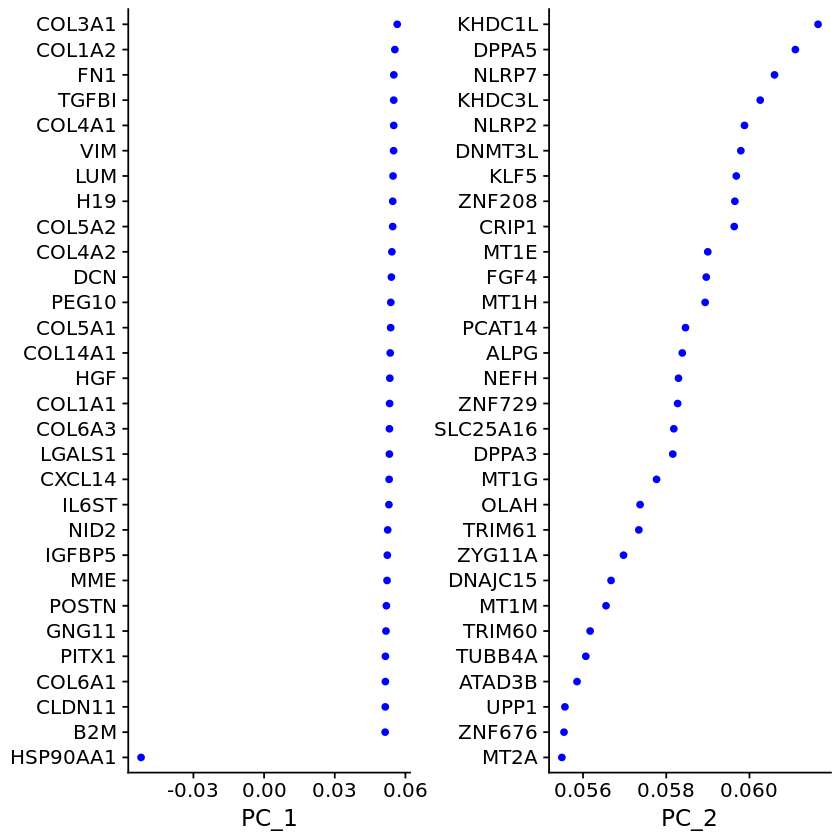

In [21]:
VizDimLoadings(so_norm, dims = 1:2, reduction = "pca")

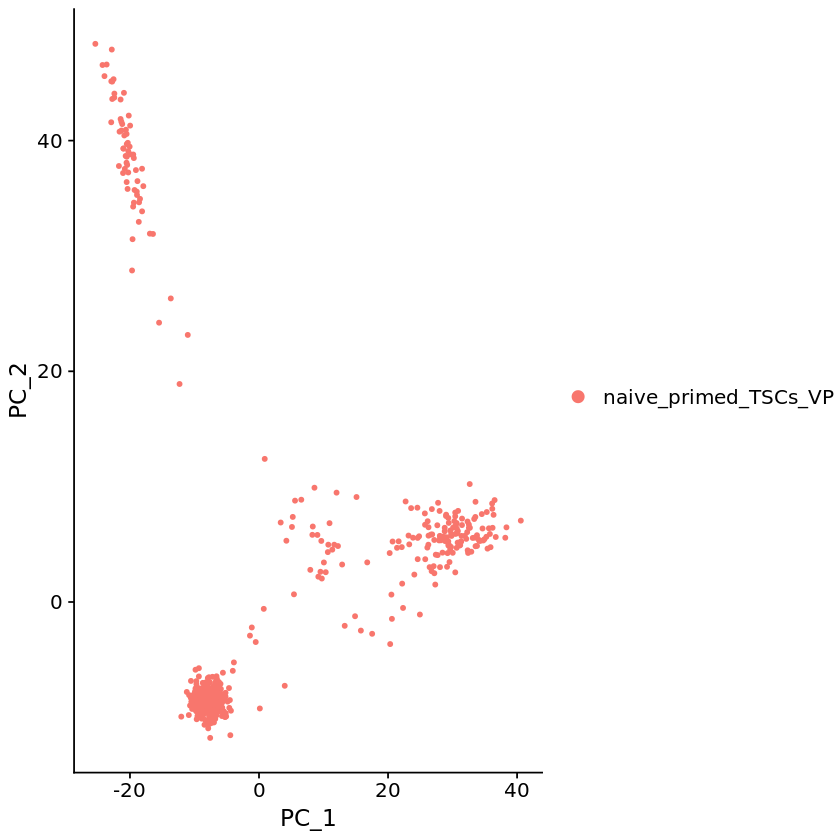

In [22]:
DimPlot(so_norm, reduction = "pca")

Elbow plot

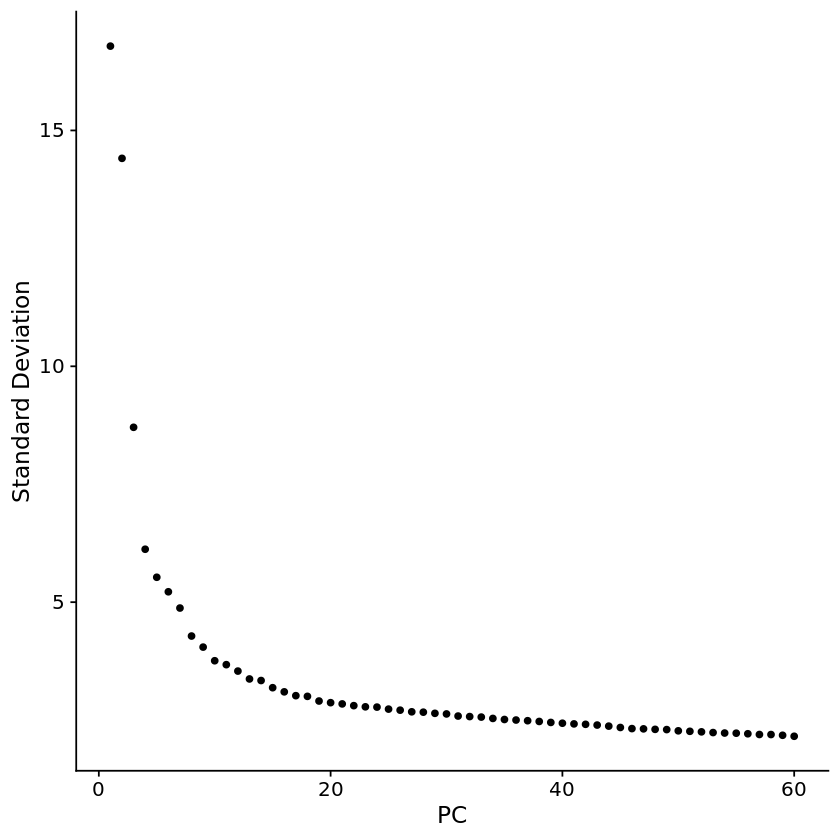

In [56]:
ElbowPlot(
 so_norm,
  ndims = 60)

# Cluster the cells

In [23]:
so_norm <- FindNeighbors(so_norm, dims = 1:5)

Computing nearest neighbor graph

Computing SNN



In [25]:
so_norm <- FindClusters(so_norm,dims = 1:5, resolution =0.2)
    

Warning message:
“The following arguments are not used: dims”
Warning message:
“The following arguments are not used: dims”


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 629
Number of edges: 16642

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9283
Number of communities: 5
Elapsed time: 0 seconds


In [26]:
head(so_norm@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,RNA_snn_res.0.2,seurat_clusters
,<fct>,<dbl>,<int>,<dbl>,<fct>,<fct>
AAACGCTAGGTCCTGC.1,naive_primed_TSCs_VP,38372,7121,14.148337,0,0
AAAGAACCAACAGAGC.1,naive_primed_TSCs_VP,50804,7902,11.278639,0,0
AAAGAACGTAGCCCTG.1,naive_primed_TSCs_VP,55443,7953,11.496492,0,0
AAAGGATAGCTCGAAG.1,naive_primed_TSCs_VP,35159,6107,15.378708,4,4
AAAGGATCACAAATGA.1,naive_primed_TSCs_VP,23777,6107,7.789040,2,2
AAAGGTATCGGAACTT.1,naive_primed_TSCs_VP,15220,3848,9.165572,1,1


In [29]:
so_norm <- RunUMAP(so_norm,
  reduction = "pca",
  dims = 1:5, seed.use =5555)

12:52:03 UMAP embedding parameters a = 0.9922 b = 1.112

12:52:03 Read 629 rows and found 5 numeric columns

12:52:03 Using Annoy for neighbor search, n_neighbors = 30

12:52:03 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

12:52:03 Writing NN index file to temp file /tmp/RtmpU65yhq/file2dcf6d6934e8

12:52:03 Searching Annoy index using 1 thread, search_k = 3000

12:52:04 Annoy recall = 100%

12:52:04 Commencing smooth kNN distance calibration using 1 thread

12:52:04 Found 2 connected components, 
falling back to 'spca' initialization with init_sdev = 1

12:52:04 Initializing from PCA

12:52:04 Using 'irlba' for PCA

12:52:04 PCA: 2 components explained 77.28% variance

12:52:04 Commencing optimization for 500 epochs, with 21572 positive edges

12:52:06 Optimization

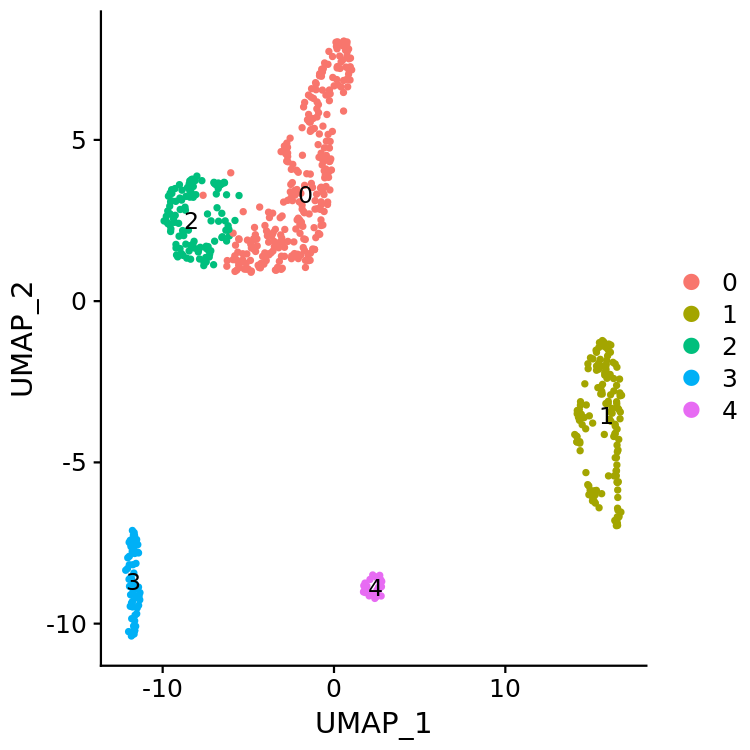

In [30]:
options(repr.plot.width = 5, repr.plot.height = 5, repr.plot.res = 150)
DimPlot(so_norm, reduction = "umap", label=T)

In [31]:
so_norm

An object of class Seurat 
24525 features across 629 samples within 1 assay 
Active assay: RNA (24525 features, 2000 variable features)
 2 dimensional reductions calculated: pca, umap

In [32]:
gene_list <-  c( "POU5F1","SOX2", "NANOG", #core
               "OTX2", "ZIC2", "CD24","DUSP6", "TCF4", #primed
                "KLF17", "KLF4", "SUSD2", "DNMT3L","DPPA5", "TFCP2L1",   #naive
               "GATA2","GATA3", "ITGA6", "TP63", "KRT7", "KRT18", "HAND1","NR2F2",#trophectoderm
             "LUM", "NID2", "FOXF1", "HAND1", "VIM", "POSTN","ANXA1", "PITX1", # EXM
                "SOX17", "GATA4", "GATA6","FOXA2", "PDGFRA", "CDH2",#prE
                "HLA-G", "MMP2",  #EVT
                "CGA", "CGB3", "SDC1", "CK7", #ST 
                "WNT6", "GABRP", "ISL1", "HEY1", "HAND1", "CDH10","CTSV","TPM1", #Amnion  
                "MIXL1", "MESP1", "EPHA4", "ZIC3", "GSC", "TBXT", "FOXF1", "HAND1", "CDX1", "CDX2", "CDX4","EOMES" #Mesoderm
            )

Warning message in FetchData(object = object, vars = c(dims, "ident", features), :
“The following requested variables were not found: CK7”
Warning message in FeaturePlot(cols = c("grey", (RColorBrewer::brewer.pal(9, "Reds"))), :
“All cells have the same value (0) of TBXT.”


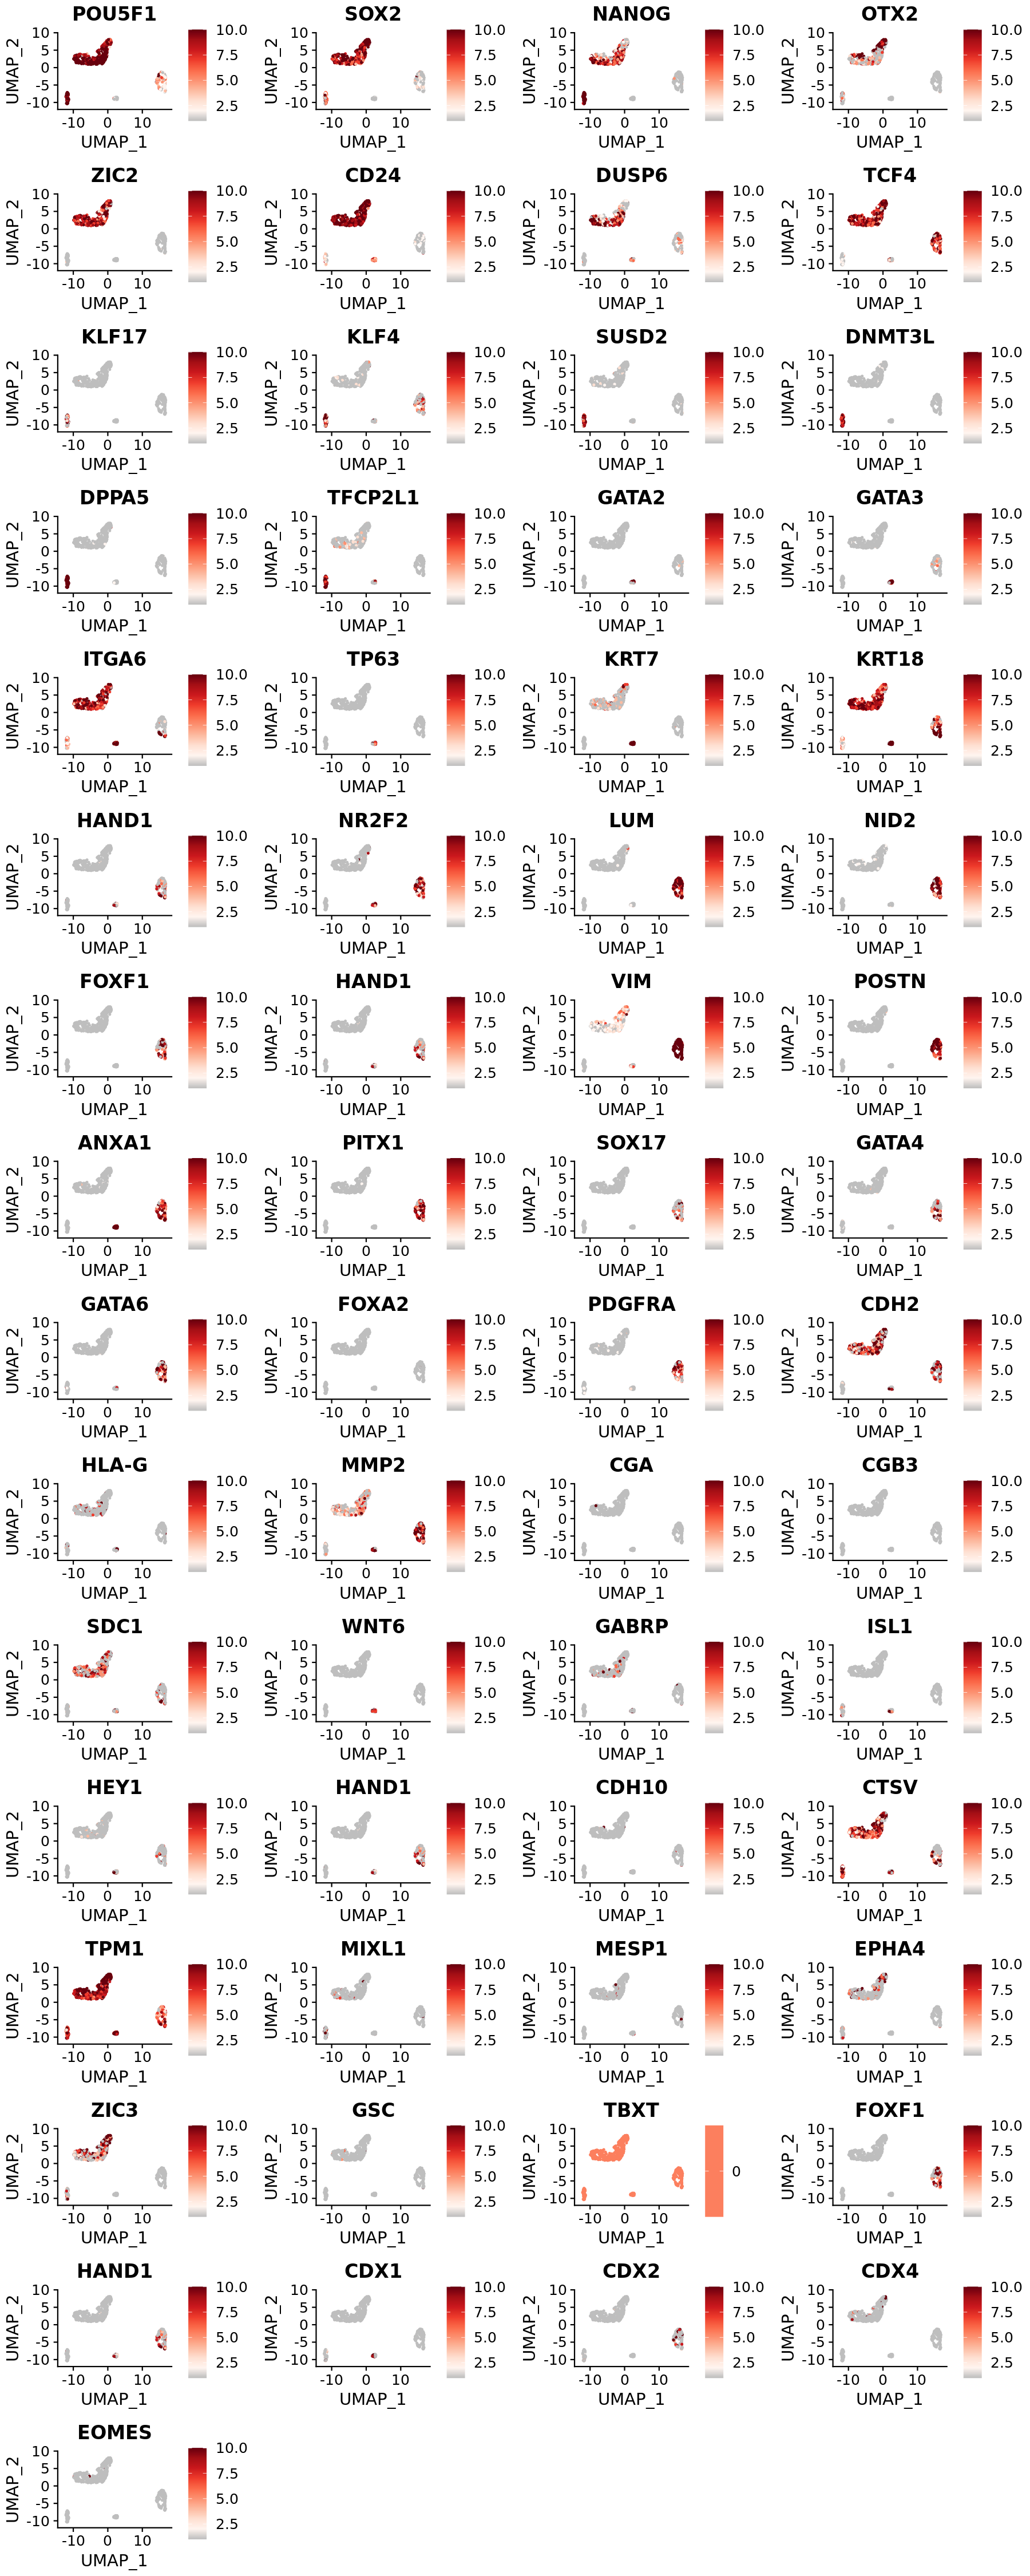

In [33]:
options(repr.plot.width = 12, repr.plot.height = 30, repr.plot.res = 150)
FeaturePlot(cols = c('grey',(RColorBrewer::brewer.pal(9,'Reds'))),
  object = so_norm,
  features = gene_list,
  pt.size = .5,
  max.cutoff = 'q75',
  ncol = 4
)

In [34]:
so_norm <- RenameIdents(
object = so_norm,
 '0' = 'Primed',
 '2' = 'Primed',
 '3' = 'Naive',
 '1' = 'EXMC',
  '4' = 'TSC'
)

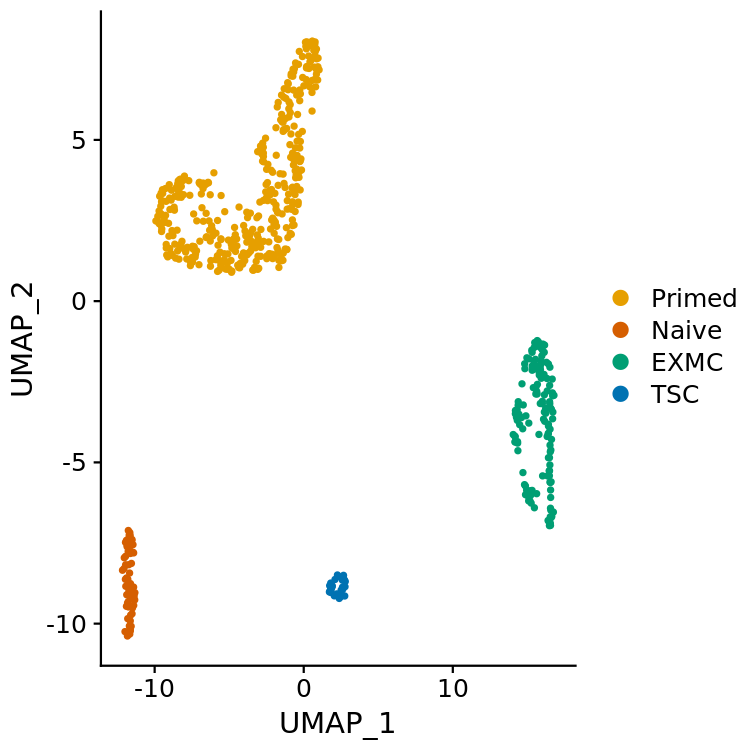

In [37]:
#Figure 1E
options(repr.plot.width = 5, repr.plot.height = 5, repr.plot.res = 150)
p<-DimPlot(so_norm, reduction="umap", cols = c("#E69F00", "#D55E00","#009E73", "#0072B2", "#CC79A7"))
p

In [40]:
pdf("Figures/Fig1E_UMAP_naive_primed_TSC_VP.pdf", width = 5, height = 5)
plot(p)
dev.off()

png 
  2

In [46]:
so_norm@meta.data$Cell.type<- as.character(so_norm@meta.data$seurat_clusters)

In [47]:
so_norm$Cell.type[which(so_norm$seurat_clusters=="0")]<- "Primed"
so_norm$Cell.type[which(so_norm$seurat_clusters=="2")]<- "Primed"
so_norm$Cell.type[which(so_norm$seurat_clusters=="3")]<- "Naive"
so_norm$Cell.type[which(so_norm$seurat_clusters=="1")]<- "EXMC"
so_norm$Cell.type[which(so_norm$seurat_clusters=="4")]<- "TSC"


In [48]:
## Save RDS file
saveRDS(so_norm, "so_naive_primed_TSC_VP.rds")

In [ ]:
##Figure 2A

Warning message in DoHeatmap(so_norm, features = gene_list, size = 5):
“The following features were omitted as they were not found in the scale.data slot for the RNA assay: CK7”
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



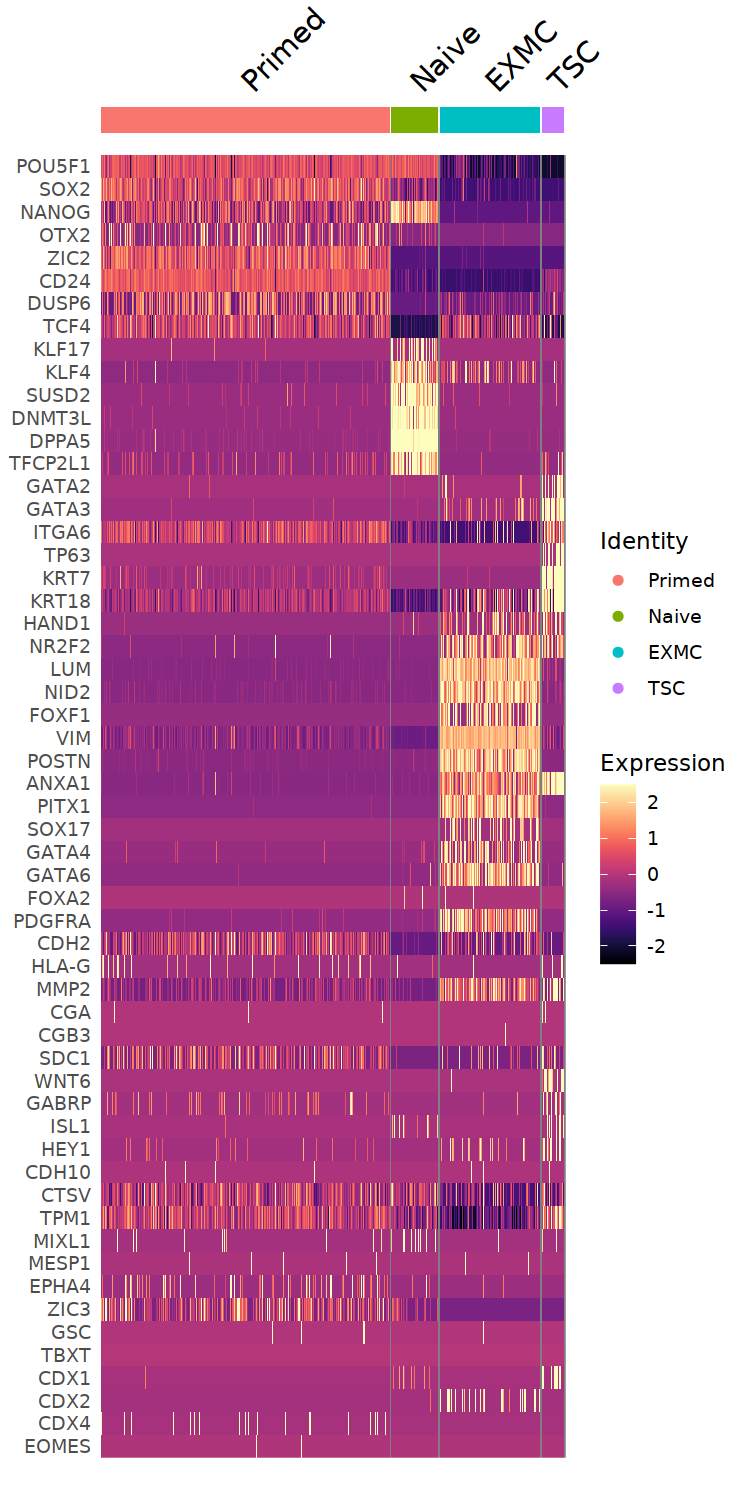

In [50]:
options(repr.plot.width=5, repr.plot.height=10)
heatmap<- DoHeatmap(so_norm, features = gene_list, size = 5)+ scale_fill_viridis(option = "A")
heatmap

In [53]:
pdf("Figures/Fig2A_Heatmap_naive_primed_TSC_VP_markers.pdf", width = 5, height = 10)
plot(heatmap)
dev.off()

png 
  2